In [1]:
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/loan

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/loan


In [8]:
#conda list

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
warnings.simplefilter('ignore')

%matplotlib inline

In [11]:
loan = pd.read_csv('loan_table.csv', parse_dates = ['date'])
borrower = pd.read_csv('borrower_table.csv')

In [12]:
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [13]:
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [14]:
loan.describe()

,loan_id,loan_granted,loan_repaid
count,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.471355,0.644353
std,288662.006929,0.499181,0.478714
min,30.000000,0.000000,0.000000
25%,250333.750000,0.000000,0.000000
50%,499885.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000
max,999987.000000,1.000000,1.000000


In [15]:
borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


# Data Processing

In [16]:
data = pd.merge(left = loan, right = borrower, on = 'loan_id')

In [17]:
data.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 16 columns):
loan_id                                            101100 non-null int64
loan_purpose                                       101100 non-null object
date                                               101100 non-null datetime64[ns]
loan_granted                                       101100 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64

In [19]:
data['month'] = data['date'].apply(lambda x: x.month)
data['week'] = data['date'].apply(lambda x: x.week)
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

In [20]:
data[['loan_repaid', 'loan_granted']]
#if no granted, i have no information about repaid

,loan_repaid,loan_granted
0,NaN,0
1,NaN,0
2,NaN,0
3,1.0,1
4,0.0,1
5,NaN,0
6,1.0,1
7,0.0,1
8,1.0,1
9,NaN,0


In [21]:
data = data[data['loan_granted'] == 1]

In [22]:
data.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,month,week,dayofweek
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,6,26,2
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,5,21,0
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,3,11,2
7,303138,emergency_funds,2012-08-31,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,8,35,4
8,91475,investment,2012-05-25,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,5,21,4


In [23]:
missing = data.isnull().sum()
missing[missing > 0]

fully_repaid_previous_loans                        25789
currently_repaying_other_loans                     25789
avg_percentage_credit_card_limit_used_last_year      903
dtype: int64

We now need to predict whether or not the used repaid the loan

In [24]:
data.columns
data.drop(['loan_id', 'date', 'loan_granted'], axis = 1, inplace = True)
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,month,week,dayofweek
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,6,26,2
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,5,21,0
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,3,11,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,8,35,4
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,5,21,4


# EDA

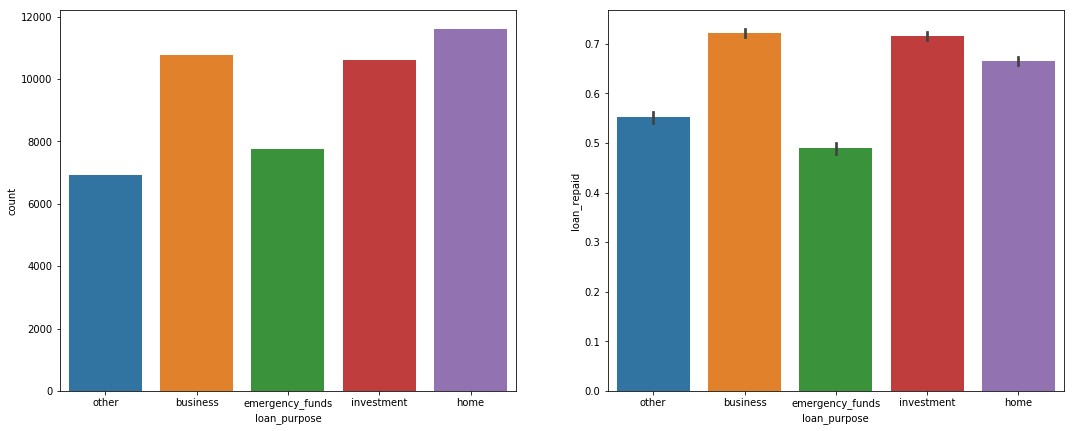

In [25]:
#loan_purpose
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'loan_purpose', data=data, ax = ax[0])


sns.barplot(x = 'loan_purpose', y = 'loan_repaid', data=data, ax = ax[1])

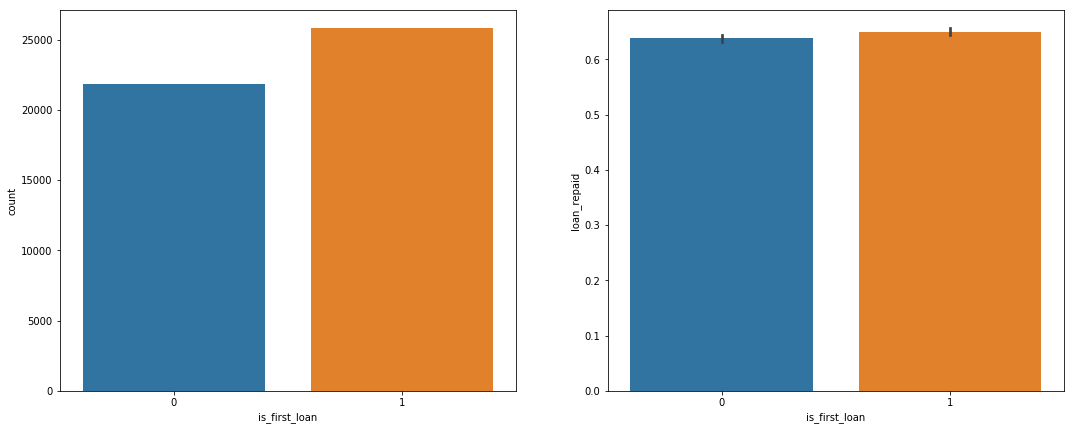

In [26]:
#is_first_loan
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'is_first_loan', data=data, ax = ax[0])


sns.barplot(x = 'is_first_loan', y = 'loan_repaid', data=data, ax = ax[1])

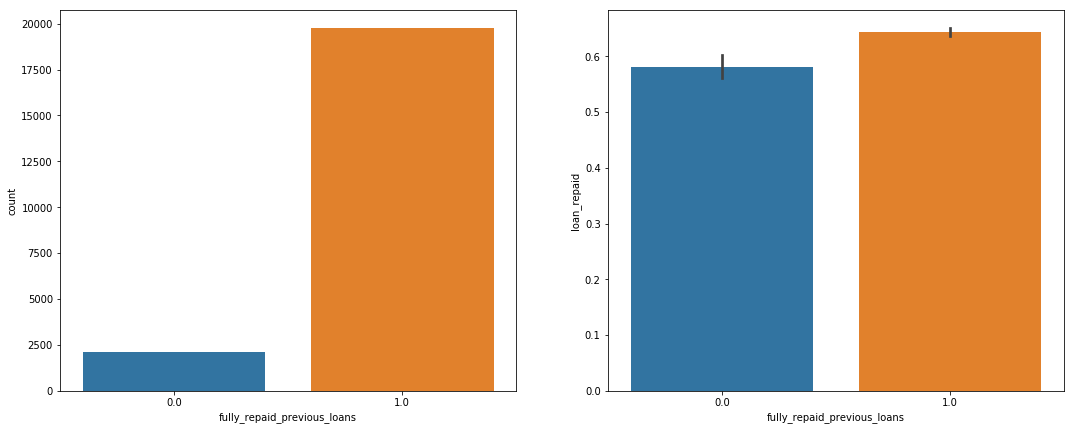

In [27]:
#fully_repaid_previous_loan
#is_first_loan
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'fully_repaid_previous_loans', data=data, ax = ax[0])


sns.barplot(x = 'fully_repaid_previous_loans', y = 'loan_repaid', data=data, ax = ax[1])

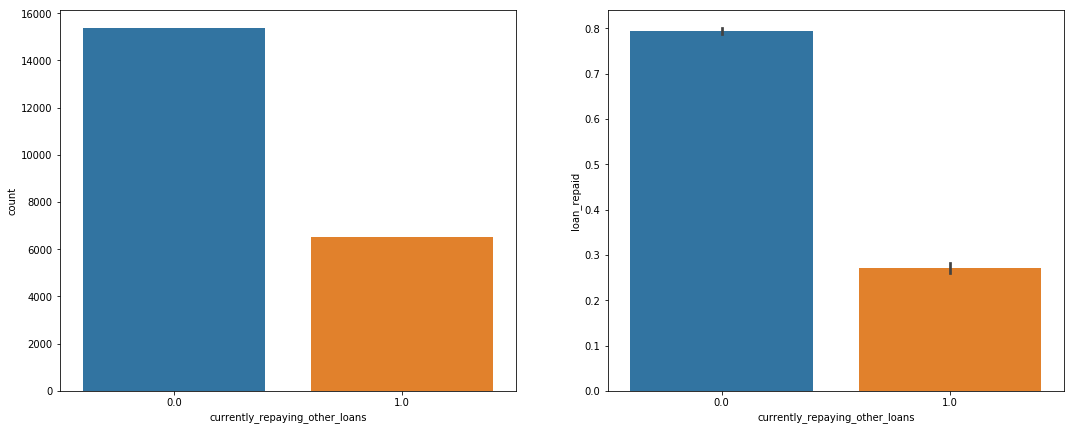

In [28]:
#currently_repaying_other_loans
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'currently_repaying_other_loans', data=data, ax = ax[0])


sns.barplot(x = 'currently_repaying_other_loans', y = 'loan_repaid', data=data, ax = ax[1])


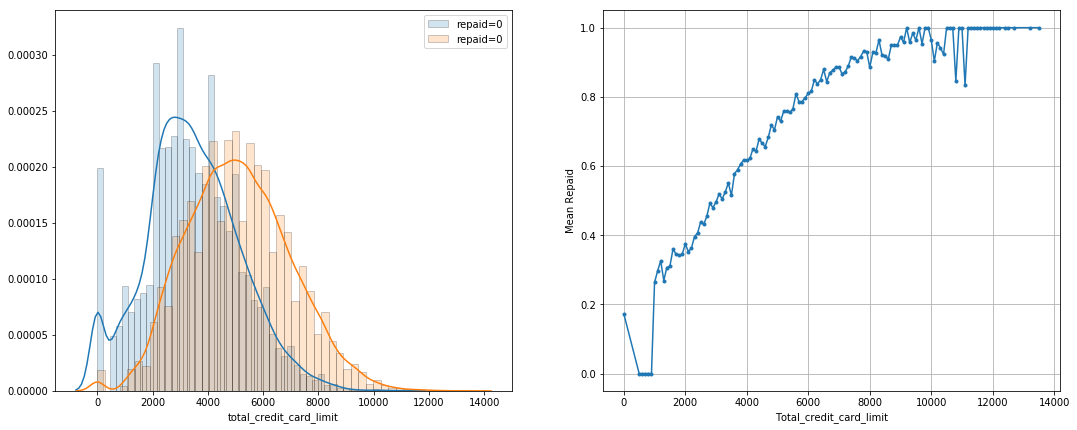

In [29]:
#total_credit_card_limit

grouped = data[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit')
mean = grouped.mean().reset_index()
mean.head()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
hist_kws = {'histtype':  'bar', 'edgecolor':'black', 'alpha':0.2}
warnings.filterwarnings('ignore')

sns.distplot(data[data['loan_repaid']==0]['total_credit_card_limit'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid']==1]['total_credit_card_limit'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()

ax[1].plot(mean['total_credit_card_limit'], mean['loan_repaid'], '.-')
ax[1].set_xlabel('Total_credit_card_limit')
ax[1].set_ylabel('Mean Repaid')
ax[1].grid(True)

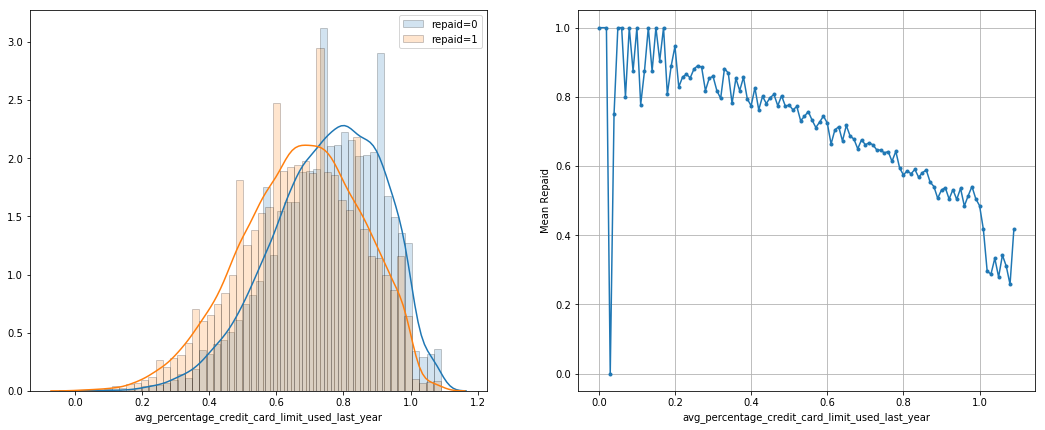

In [30]:
#avg_percentage_credit_card_limit_used_last_year
notnull=data[~data['avg_percentage_credit_card_limit_used_last_year'].isnull()]
grouped = notnull.groupby('avg_percentage_credit_card_limit_used_last_year')
mean = grouped.mean().reset_index()
mean.head()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
hist_kws = {'histtype':  'bar', 'edgecolor':'black', 'alpha':0.2}
warnings.filterwarnings('ignore')

sns.distplot(notnull[notnull['loan_repaid']==0]['avg_percentage_credit_card_limit_used_last_year'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(notnull[notnull['loan_repaid']==1]['avg_percentage_credit_card_limit_used_last_year'], label = 'repaid=1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()

ax[1].plot(mean['avg_percentage_credit_card_limit_used_last_year'], mean['loan_repaid'], '.-')
ax[1].set_xlabel('avg_percentage_credit_card_limit_used_last_year')
ax[1].set_ylabel('Mean Repaid')
ax[1].grid(True)

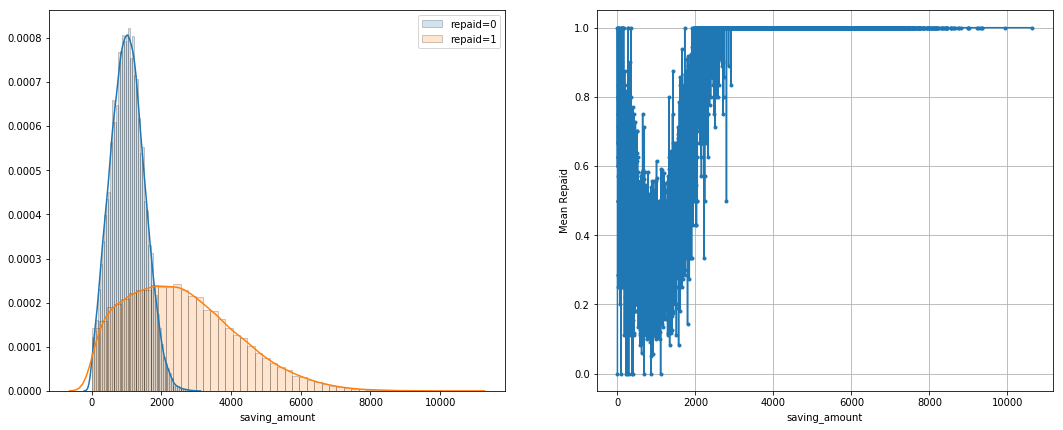

In [31]:
#saving_amount

grouped = data[['saving_amount', 'loan_repaid']].groupby('saving_amount')
mean = grouped.mean().reset_index()
mean.head()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
hist_kws = {'histtype':  'bar', 'edgecolor':'black', 'alpha':0.2}
warnings.filterwarnings('ignore')

sns.distplot(data[data['loan_repaid']==0]['saving_amount'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid']==1]['saving_amount'], label = 'repaid=1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()

ax[1].plot(mean['saving_amount'], mean['loan_repaid'], '.-')
ax[1].set_xlabel('saving_amount')
ax[1].set_ylabel('Mean Repaid')
ax[1].grid(True)

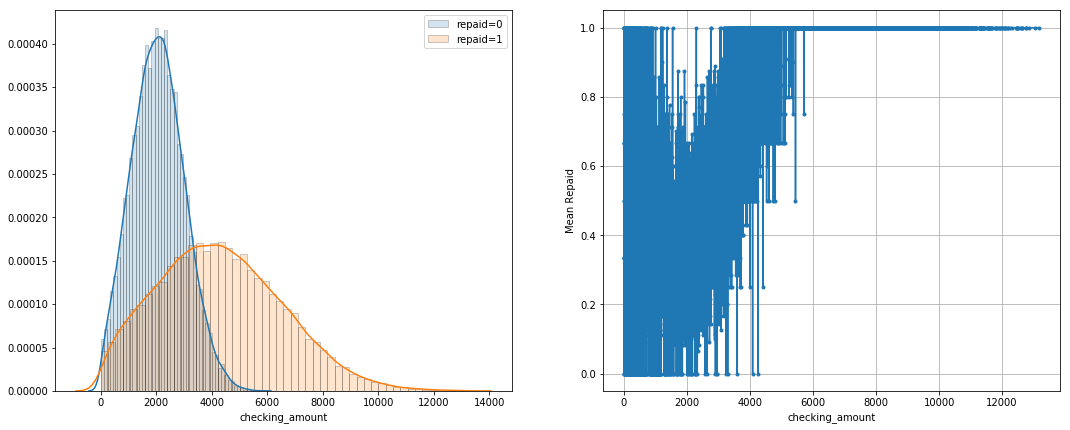

In [32]:
#checking_amount

grouped = data[['checking_amount', 'loan_repaid']].groupby('checking_amount')
mean = grouped.mean().reset_index()
mean.head()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
hist_kws = {'histtype':  'bar', 'edgecolor':'black', 'alpha':0.2}
warnings.filterwarnings('ignore')

sns.distplot(data[data['loan_repaid']==0]['checking_amount'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid']==1]['checking_amount'], label = 'repaid=1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()

ax[1].plot(mean['checking_amount'], mean['loan_repaid'], '.-')
ax[1].set_xlabel('checking_amount')
ax[1].set_ylabel('Mean Repaid')
ax[1].grid(True)

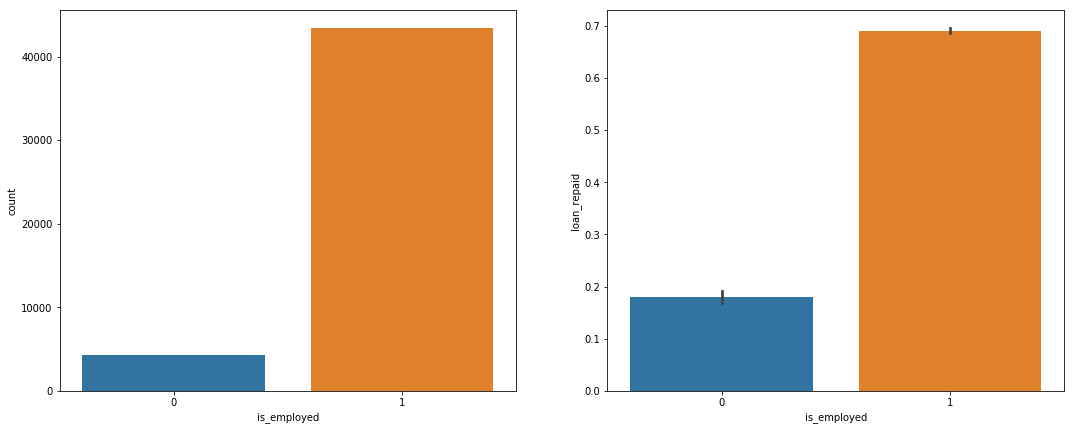

In [33]:
#is_employed

#currently_repaying_other_loans
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'is_employed', data=data, ax = ax[0])


sns.barplot(x = 'is_employed', y = 'loan_repaid', data=data, ax = ax[1])


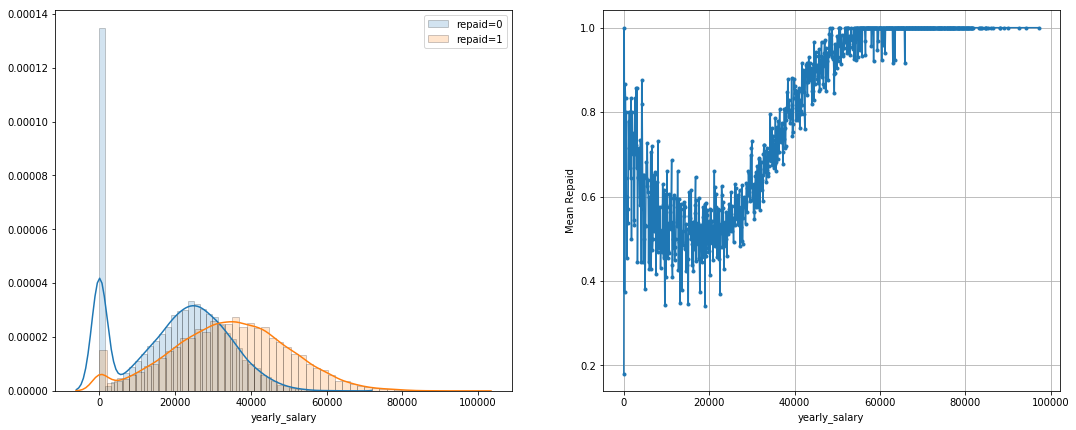

In [34]:
#yearly_salary

grouped = data[['yearly_salary', 'loan_repaid']].groupby('yearly_salary')
mean = grouped.mean().reset_index()
mean.head()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
hist_kws = {'histtype':  'bar', 'edgecolor':'black', 'alpha':0.2}
warnings.filterwarnings('ignore')

sns.distplot(data[data['loan_repaid']==0]['yearly_salary'], label = 'repaid=0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid']==1]['yearly_salary'], label = 'repaid=1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()

ax[1].plot(mean['yearly_salary'], mean['loan_repaid'], '.-')
ax[1].set_xlabel('yearly_salary')
ax[1].set_ylabel('Mean Repaid')
ax[1].grid(True)

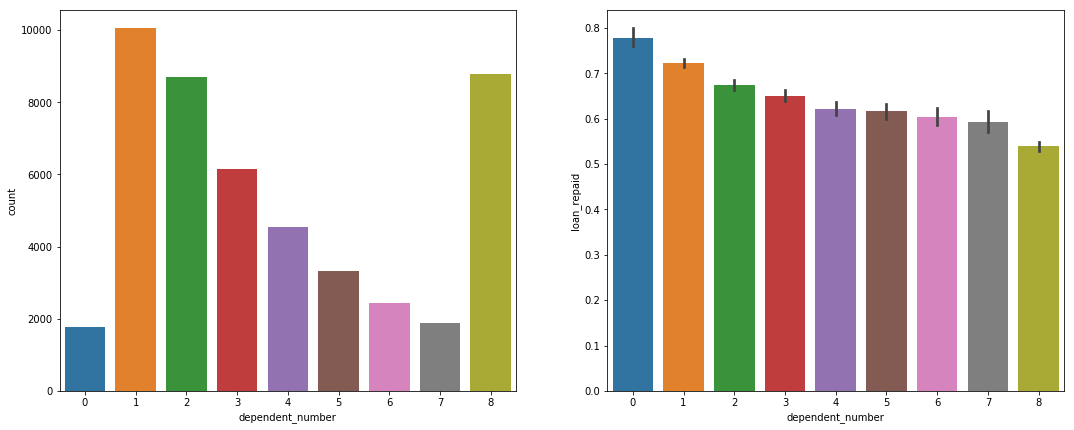

In [35]:
#dependent_number

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'dependent_number', data=data, ax = ax[0])


sns.barplot(x = 'dependent_number', y = 'loan_repaid', data=data, ax = ax[1])


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

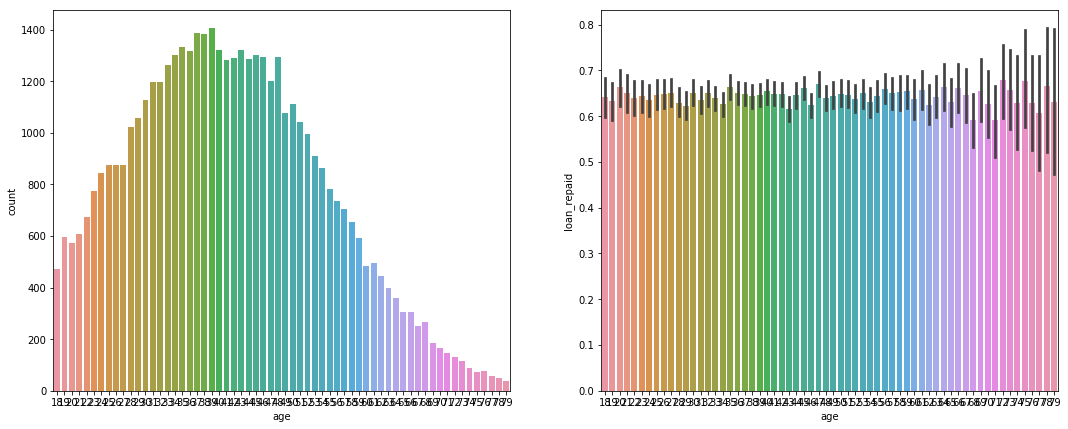

In [36]:
#age
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'age', data=data, ax = ax[0])


sns.barplot(x = 'age', y = 'loan_repaid', data=data, ax = ax[1])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

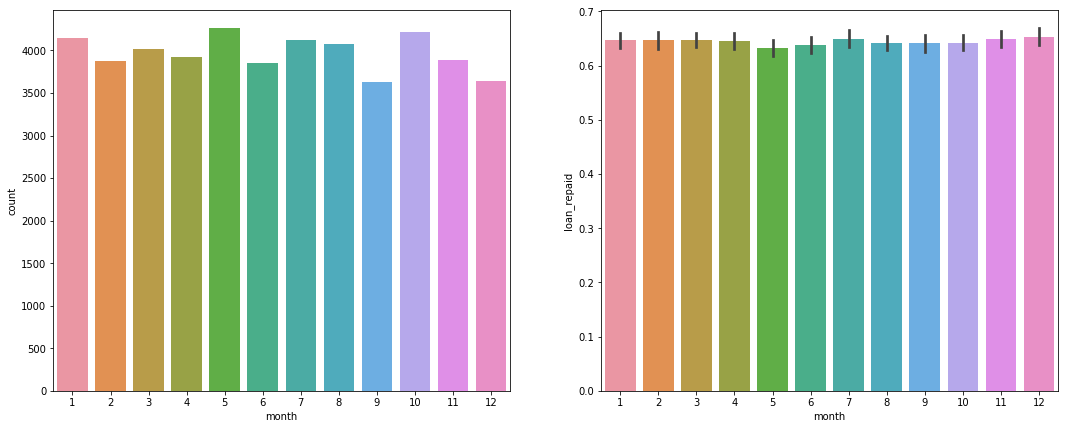

In [37]:
#month
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'month', data=data, ax = ax[0])


sns.barplot(x = 'month', y = 'loan_repaid', data=data, ax = ax[1])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

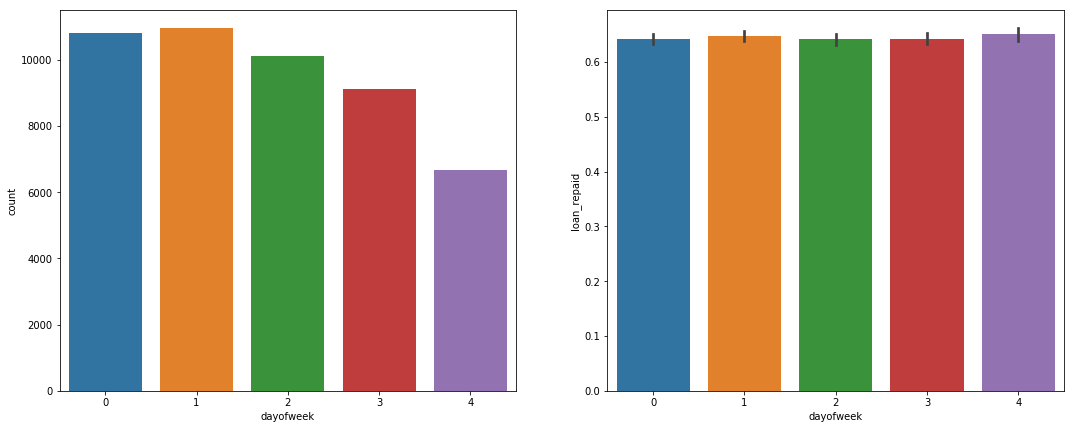

In [38]:
#month
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'dayofweek', data=data, ax = ax[0])


sns.barplot(x = 'dayofweek', y = 'loan_repaid', data=data, ax = ax[1])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

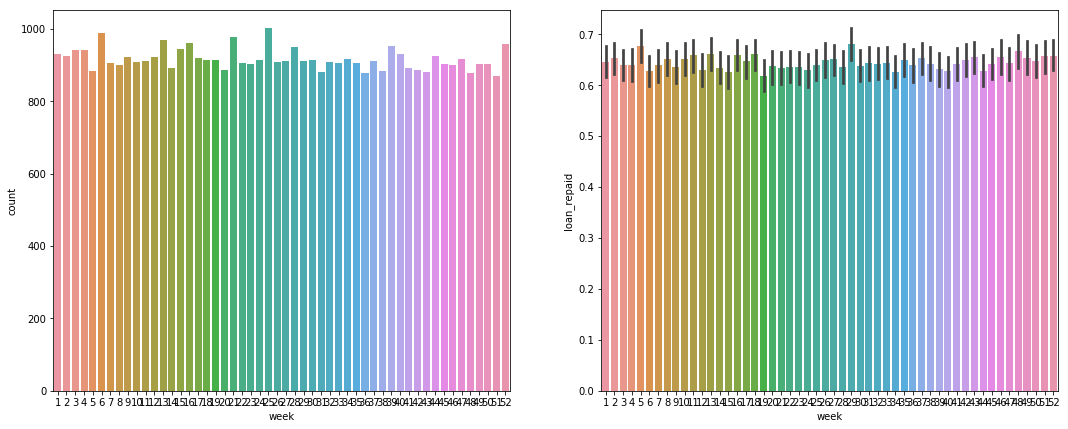

In [39]:
#week
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))

sns.countplot(x = 'week', data=data, ax = ax[0])


sns.barplot(x = 'week', y = 'loan_repaid', data=data, ax = ax[1])
plt.tight_layout

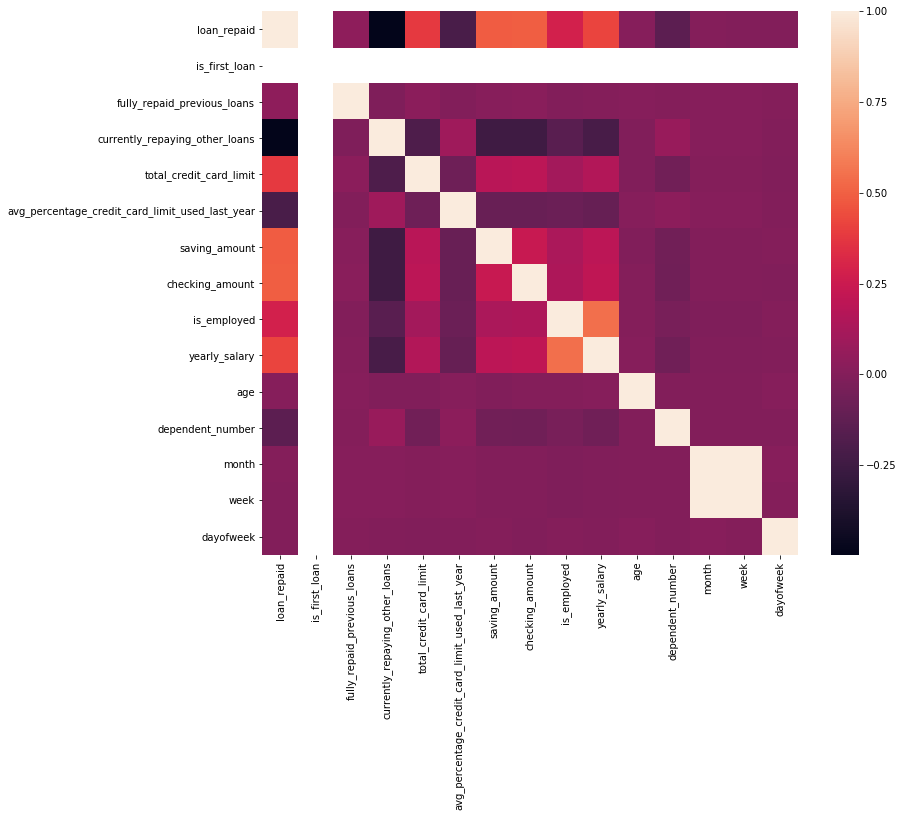

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.dropna(axis = 0, how = 'any').corr(), ax = ax)

# Feature Engineering

**is_first_loan and paying other loan**

In [41]:
print(data[data['is_first_loan']==1][['is_first_loan', 'fully_repaid_previous_loans']].nunique())
print()
print(data[data['is_first_loan']==1][['is_first_loan', 'currently_repaying_other_loans']].nunique())

is_first_loan                  1
fully_repaid_previous_loans    0
dtype: int64

is_first_loan                     1
currently_repaying_other_loans    0
dtype: int64


In [42]:
data.fillna({'fully_repaid_previous_loans': -1, 'currently_repaying_other_loans':-1}, inplace = True)

**avg_precentage_credit_card_limit_used_last_year missing values**

In [43]:
#fill with median value
median = data['avg_percentage_credit_card_limit_used_last_year'].median()
data.fillna({'avg_percentage_credit_card_limit_used_last_year': median}, inplace = True)

In [44]:
#drop useless features
data.drop(['month', 'week', 'dayofweek'], axis = 1, inplace = True)

In [45]:
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null object
loan_repaid                                        47654 non-null float64
is_first_loan                                      47654 non-null int64
fully_repaid_previous_loans                        47654 non-null float64
currently_repaying_other_loans                     47654 non-null float64
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    47654 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null int64
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
dependent_number 

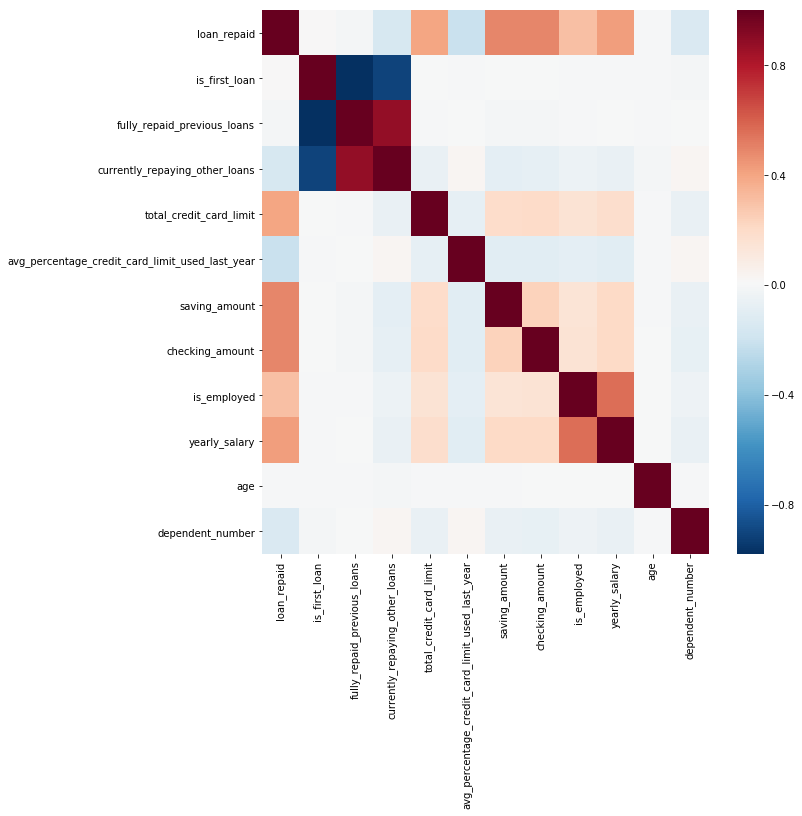

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.dropna(axis = 0, how = 'any').corr(), ax = ax, cmap = 'RdBu_r')

# Machine Learning

In [48]:
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [49]:
encoder = LabelEncoder()
data['loan_purpose'] = encoder.fit_transform(data['loan_purpose'])

In [50]:
categorical_feature = ['loan_purpose', 'is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans', 'is_employed']
target = 'loan_repaid'

data[categorical_feature]= data[categorical_feature].astype('category')
data[target] = data[target].astype('category')

In [51]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null category
loan_repaid                                        47654 non-null category
is_first_loan                                      47654 non-null category
fully_repaid_previous_loans                        47654 non-null category
currently_repaying_other_loans                     47654 non-null category
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    47654 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null category
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
depend

In [52]:
#data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,4,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,0,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,0,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,3,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [55]:
X = data.drop('loan_repaid', axis = 1)
y=data['loan_repaid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [56]:
#d_train = lgb.Dataset(data=X_train, label = y_train, categorical_feature= categorical_feature, free_raw_data=False)

In [67]:
#Use RandomForest First
forest = RandomForestClassifier()
param_grid = {'n_estimators': [50,100,150]}

In [68]:
gc = GridSearchCV(forest, param_grid, cv=5)

In [69]:
gc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
gc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
gc.best_params_

{'n_estimators': 100}

In [88]:
best_forest = RandomForestClassifier(n_estimators=100)

In [89]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
print(classification_report(y_test, gc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      4237
         1.0       0.95      0.93      0.94      7677

   micro avg       0.92      0.92      0.92     11914
   macro avg       0.91      0.92      0.92     11914
weighted avg       0.92      0.92      0.92     11914



In [150]:
print(classification_report(y_test, best_forest.predict(X_test)))
#unbalanced data but the prediction shows strong prediction power

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      4237
         1.0       0.95      0.93      0.94      7677

   micro avg       0.92      0.92      0.92     11914
   macro avg       0.91      0.92      0.92     11914
weighted avg       0.92      0.92      0.92     11914



In [98]:
best_forest.feature_importances_

array([0.01769913, 0.00324389, 0.00516688, 0.03637992, 0.11213499,
       0.04814965, 0.297045  , 0.26820765, 0.02041656, 0.13509962,
       0.03424539, 0.02221133])

In [104]:
feature_importance = pd.DataFrame({'features': X_train.columns, 'Feature_importance': best_forest.feature_importances_})
feature_importance.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
feature_importance

,features,Feature_importance
6,saving_amount,0.297045
7,checking_amount,0.268208
9,yearly_salary,0.135100
4,total_credit_card_limit,0.112135
5,avg_percentage_credit_card_limit_used_last_year,0.048150
3,currently_repaying_other_loans,0.036380
10,age,0.034245
11,dependent_number,0.022211
8,is_employed,0.020417
0,loan_purpose,0.017699


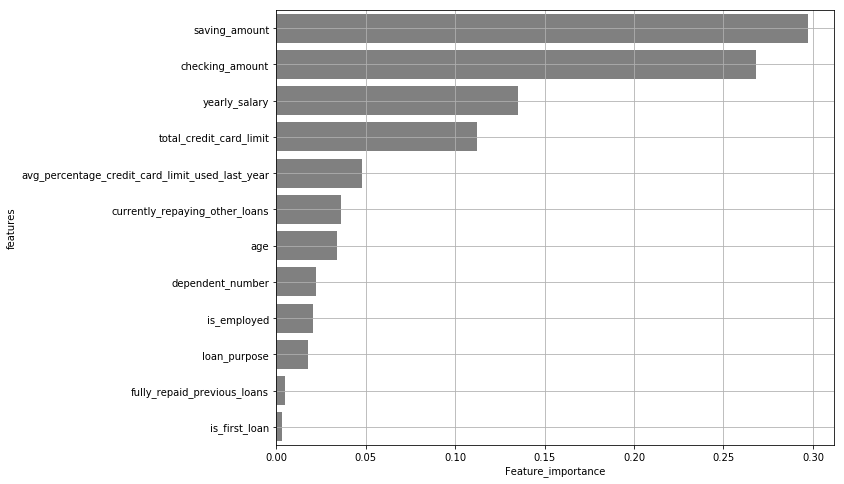

In [110]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x = 'Feature_importance', y='features', data = feature_importance, color = 'grey')
ax.grid(True)

# Question 1 How's the model performance

In [116]:
#Total profit from proginal bank
loan_paid = y_test.astype(int).values
total_profit = np.sum(loan_paid*2-1)
print(total_profit)

3440


In [121]:
def calculate_profit(loan_paid, probability, threshold):
    loan_granted = (probability > threshold).astype(int)
    profit = 0
    for i in range(len(loan_paid)):
        if loan_granted[i] == 1:
            if loan_paid[i]==0:
                profit -=1
            else:
                profit +=1
                
    return profit

In [132]:
predp = best_forest.predict_proba(X_test)[:, 1]

11914

In [148]:
max(profit)

6749

In [134]:
threshold_list = list(np.linspace(0, 1 , 100))
profit = []
for threshold in threshold_list:
    profit.append(calculate_profit(loan_paid,predp, threshold ))

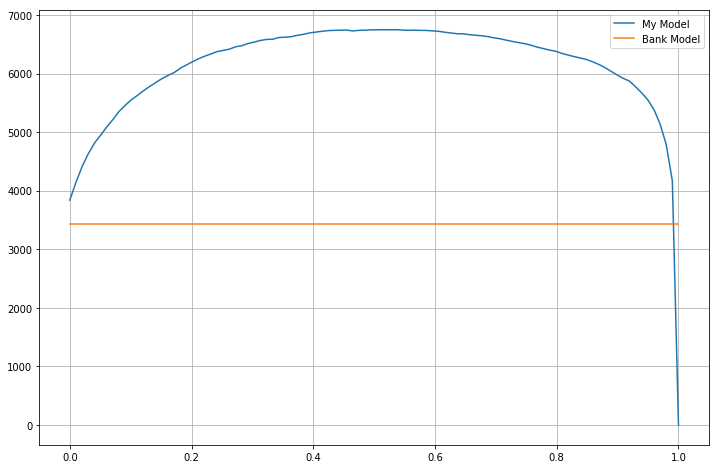

In [146]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(threshold_list, profit, label = 'My Model')
ax.plot(threshold_list, [total_profit]*len(threshold_list), label = 'Bank Model')
ax.legend()
ax.grid(True)

**According to the picture we can find the best threshold**

# Question 2: Describe the impact of the most important variables on the prediction. Also, focus on the variable "is_employed", which describes whether the borrower is employed when she asks for the loan. How does this variable impact the model? Explain why


According to the model the checking_amount and saving_amount are the most important variables.

'is_employed' variable is not informative according to the model. But what's worth attention is that the salary variable can be related to the is_employed as all unployment people has salary 0.

# Question 3: Are there any other variables, not in the data provided, that you'd have liked to include in the model?#

Usually the variables should include: user characteristic, user behavior and external variables.

The data set is more lack of user characteristic data, for example:

1.Marriage

    Two peoples paying ability is ususlly stronger than one person

2.Housing Status

    People with house can sell the house to pay money back

3.Family Status
    
    It depends. People with large family can either has strong burden or strong support. The families' economic status is also worth considering


4.Education Level
    
    People with higher educations level tends to perform better.

5.External variables include macro economic metrics such as unemployment rate etc. 